In [1]:
import networkx as nx
import random
from collections import defaultdict
import matplotlib.pyplot as plt
import numpy as np
from tabulate import tabulate
import sys
import copy
sys.path.append('.')
sys.path.append('../../')
%load_ext autoreload
%autoreload 2
from graph_creation import create_graph
from abeba_methods import simulate_epoch, compute_activation
from metrics import polarisation, sarle_bimodality, disagreement
from content.metrics import feed_entropy, feed_satisfaction
from content.content_recommender import simulate_epoch_content_recommender

In [2]:
def bootstrap(config):
    return create_graph(
        config["n_nodes"],
        config["beta"],
        avg_friend = config["avg_friend"],
        prob_post = config["prob_post"],
        hp_alpha = config["hp_alpha"],
        hp_beta = config["hp_beta"],
    )

In [3]:
def print_graph(G, title):
    print(title)
    colors = list(nx.get_node_attributes(G, 'opinion').values())
    labels =  nx.get_node_attributes(G, 'opinion')
    print(tabulate([[key] + [np.round(val, 3)] for key, val in labels.items()], headers=["node label", "opinion value"]))
    nx.draw(G, labels= dict([index for index in enumerate(labels)]), node_color=colors, font_color='darkturquoise', vmin=-1, vmax=1, cmap = plt.cm.get_cmap('magma'))
    plt.show()

In [4]:
def run_epochs(G, num_epochs, params):
    strategies = ["no_recommender", "random", "normal", "nudge", "similar", "unsimilar"]
    # Simulating an epoch and printing the opinion graph obtained
    graphs = {}
    for strategy in strategies:
        graphs[strategy] = copy.deepcopy(G)
    for i in range(num_epochs):
        print(i)
        for strategy in strategies:
            graphs[strategy] = simulate_epoch_content_recommender(
                graphs[strategy], 
                0.5, 
                epsilon = 0.1,
                strategy = strategy,
                strat_param=params[strategy], 
                estim_strategy="kalman",
            )

        for text, curr_G in graphs.items():
            satisfaction_res = feed_satisfaction(curr_G)
            graphs[text] = curr_G
            if not(satisfaction_res == {}):
                print(f"Satisfaction ({text} - mean): {np.mean(list(satisfaction_res.values()))}")
                print(f"Satisfaction ({text} - std): {np.std(list(satisfaction_res.values()))}")
                sat_coverage = np.round(len(list(satisfaction_res.values())) / len(curr_G.nodes()) * 100, 3)
                print(f"Satisfaction ({text} - coverage): {sat_coverage}%") 
    return graphs

In [5]:
def simulate(G, num_epochs, params):
    graphs = run_epochs(G, num_epochs, params)
    
    print_graph(G, "Starting: ")
    
    for strategy, graph in graphs.items():
        print(strategy)
        print_graph(graph, strategy)

    print(graphs.keys())

    for strategy, graph in graphs.items():
        print(f"Satisfaction ({strategy} - mean): {np.mean(list(feed_satisfaction(graph).values()))}")
        print(f"Satisfaction ({strategy} - std): {np.std(list(feed_satisfaction(graph).values()))}")

Starting graph: 
  node label    opinion value
------------  ---------------
           0            0.394
           1           -0.476
           2           -0.253
           3           -0.799
           4            0.759
           5            0.918
           6           -0.466
           7           -0.784
           8           -0.17
           9            0.235
          10           -0.548
          11            0.007
          12            0.56
          13            0.886
          14           -0.594
          15           -0.889
          16            0.876
          17           -0.453
          18           -0.224
          19           -0.339
          20            0.115
          21           -0.241
          22            0.596
          23           -1
          24            0.134
          25           -0.314
          26           -0.273
          27           -0.059
          28           -0.464
          29           -0.586
          30            0.874

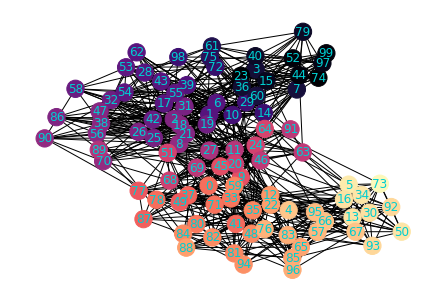

0
Satisfaction (random - mean): 0.6282136792351127
Satisfaction (random - std): 0.30095018504908655
Satisfaction (random - coverage): 50.0%
Satisfaction (normal - mean): 0.6304350807932169
Satisfaction (normal - std): 0.1651618285954821
Satisfaction (normal - coverage): 50.0%
1
Satisfaction (no_recommender - mean): 0.7804017860654074
Satisfaction (no_recommender - std): 0.11796898816083694
Satisfaction (no_recommender - coverage): 44.0%
Satisfaction (random - mean): 0.669157993933507
Satisfaction (random - std): 0.22743808476648983
Satisfaction (random - coverage): 75.0%
Satisfaction (normal - mean): 0.679907392229866
Satisfaction (normal - std): 0.14048583802843803
Satisfaction (normal - coverage): 79.0%
Satisfaction (nudge - mean): 0.7757360390189096
Satisfaction (nudge - std): 0.08306467004480826
Satisfaction (nudge - coverage): 47.0%
Satisfaction (similar - mean): 0.7696530131965089
Satisfaction (similar - std): 0.1291230170413738
Satisfaction (similar - coverage): 50.0%
Satisfacti

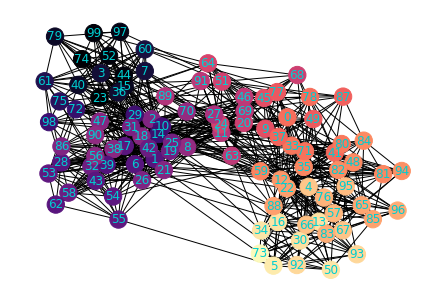

no_recommender
no_recommender
  node label    opinion value
------------  ---------------
           0           -0.084
           1           -0.058
           2           -0.036
           3           -0.138
           4           -0.167
           5           -0.099
           6           -0.082
           7           -0.083
           8           -0.05
           9           -0.133
          10           -0.091
          11           -0.101
          12           -0.12
          13           -0.219
          14           -0.144
          15           -0.094
          16           -0.175
          17           -0.06
          18           -0.077
          19           -0.054
          20           -0.096
          21           -0.063
          22           -0.125
          23           -0.06
          24           -0.091
          25           -0.114
          26           -0.064
          27           -0.101
          28           -0.054
          29           -0.059
          30  

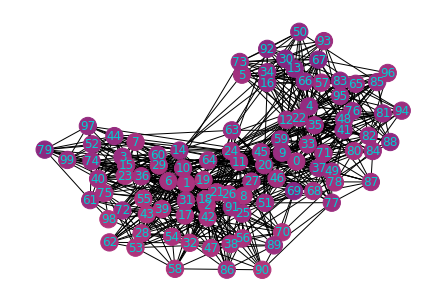

random
random
  node label    opinion value
------------  ---------------
           0            0.011
           1            0.076
           2            0.047
           3            0.069
           4            0.003
           5            0.041
           6            0.122
           7            0.097
           8            0.106
           9            0.071
          10            0.015
          11            0.159
          12            0.035
          13           -0.048
          14            0.064
          15            0.089
          16           -0.06
          17            0.078
          18            0.198
          19            0.01
          20            0.062
          21           -0.031
          22            0.048
          23           -0.003
          24           -0.063
          25           -0.108
          26           -0
          27           -0.015
          28            0.202
          29            0.082
          30           -0.021
  

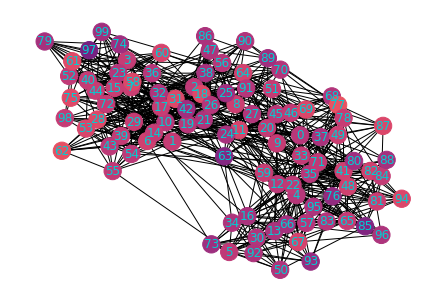

normal
normal
  node label    opinion value
------------  ---------------
           0            0.062
           1           -0.013
           2            0.048
           3            0.001
           4            0.027
           5           -0.02
           6           -0.055
           7            0.002
           8            0.003
           9            0.066
          10            0.003
          11            0.031
          12            0.027
          13            0.007
          14           -0.019
          15            0.005
          16           -0.034
          17           -0.019
          18           -0.002
          19           -0.011
          20            0.057
          21           -0.056
          22            0.023
          23            0.008
          24            0.029
          25           -0.021
          26            0.03
          27            0.022
          28            0.028
          29            0.05
          30           -0.006

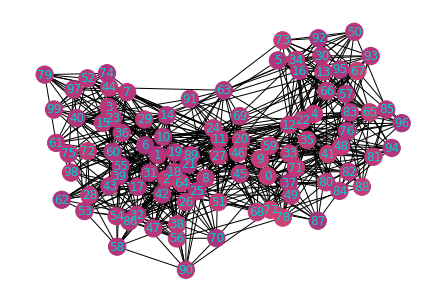

nudge
nudge
  node label    opinion value
------------  ---------------
           0            0.024
           1           -0.085
           2           -0.001
           3           -0.127
           4            0.068
           5           -0.055
           6           -0.001
           7           -0.131
           8           -0.047
           9            0.02
          10           -0.014
          11           -0.035
          12           -0.007
          13            0.021
          14            0.008
          15           -0.111
          16           -0.031
          17           -0.069
          18           -0.028
          19           -0.039
          20            0.029
          21           -0.051
          22            0.01
          23           -0.093
          24           -0.041
          25           -0.034
          26           -0.026
          27            0.003
          28           -0.044
          29           -0.078
          30           -0.024


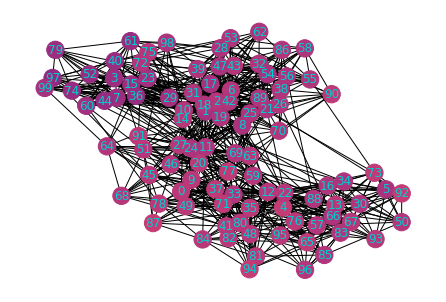

similar
similar
  node label    opinion value
------------  ---------------
           0           -0.027
           1            0.046
           2            0.069
           3            0.077
           4            0.063
           5            0.101
           6            0.085
           7            0.123
           8           -0.029
           9            0.149
          10            0.087
          11            0.05
          12            0.135
          13            0.112
          14            0.059
          15            0.09
          16            0.118
          17            0.049
          18            0.063
          19            0.045
          20            0.11
          21            0.057
          22            0.118
          23            0.058
          24            0.096
          25           -0.016
          26            0.092
          27            0.077
          28           -0.007
          29            0.057
          30            0.0

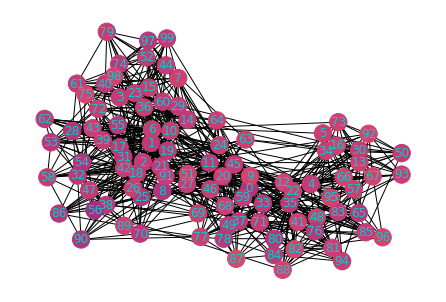

unsimilar
unsimilar
  node label    opinion value
------------  ---------------
           0            1
           1            0.937
           2            1
           3            0.998
           4           -1
           5           -1
           6            1
           7            1
           8            1
           9            1
          10            1
          11            1
          12            1
          13           -1
          14            1
          15            0.998
          16           -1
          17            1
          18            1
          19            1
          20            1
          21            1
          22           -1
          23            0.998
          24            1
          25            1
          26            1
          27            1
          28            1
          29            1
          30           -1
          31            0.992
          32            1
          33            1
          34    

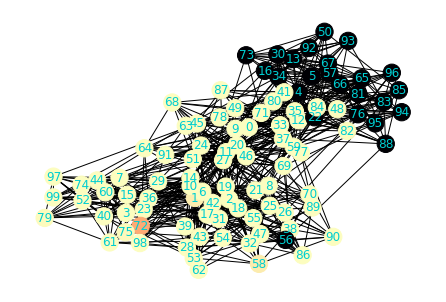

dict_keys(['no_recommender', 'random', 'normal', 'nudge', 'similar', 'unsimilar'])
Satisfaction (no_recommender - mean): 0.8412875390898809
Satisfaction (no_recommender - std): 0.0454435952913304
Satisfaction (random - mean): 0.8757697979763871
Satisfaction (random - std): 0.058999337554577966
Satisfaction (normal - mean): 0.9479542694678184
Satisfaction (normal - std): 0.02814126941873986
Satisfaction (nudge - mean): 0.9285287566243923
Satisfaction (nudge - std): 0.04210660160126737
Satisfaction (similar - mean): 0.8834530665645581
Satisfaction (similar - std): 0.04082354795656028
Satisfaction (unsimilar - mean): 0.15587667256333737
Satisfaction (unsimilar - std): 0.5944812189838313


In [9]:
def main():
    configs = {
        "n_nodes" : 100, 
        "beta": [2], 
        "avg_friend": 10, 
        "prob_post": [0.3], 
        "hp_alpha": 2, 
        "hp_beta": 0.3
    }
    
    random_param = {'n_post': 1}
    normal_param = {'normal_mean': 0.0, 'normal_std': 0.1, 'n_post': 1}
    nudge_param = {'nudge_goal': 0.0, 'n_post': 1}
    similar_param = {'similar_thresh': 0.5}
    unsimilar_param = {'unsimilar_thresh': 0.5}

    params = {
        "no_recommender": {},
        "random": random_param,
        "normal": normal_param,
        "nudge": nudge_param,
        "similar": similar_param,
        "unsimilar": unsimilar_param,
    }

    num_epochs = 100

    initial_graph = bootstrap(configs)
    print_graph(initial_graph, "Starting graph: ")

    simulate(initial_graph, num_epochs, params)

main()